In [3]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy


import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg', '025deg', '01deg']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [4]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

## Function

### timeseries 10 years

In [6]:
def time_series_10():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,175,1):
        t1.append(tt)

    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t1,x1, 'r',label = 'ST-IR value 1deg')
    plt.plot(t1,y1, 'r--',label ='Transport 1deg')
    plt.plot(t1,x2, 'b',label = 'ST-IR value 025deg')
    plt.plot(t1,y2, 'b--',label ='Transport 025deg')
    plt.plot(t1,x3, 'g',label = 'ST-IR value 01deg')
    plt.plot(t1,y3, 'g--',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC eastward transport')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC eastward transport and ST-IR value')


### timeseries 5 years

In [14]:
def time_series_5():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,184,1):
        t1.append(tt)

    for tt in range (1,180,10):
        t2.append(tt)
        
    plt.plot(t1,x1, 'r',label = 'ST-IR value 1deg')
    plt.plot(t1,y1, 'r--',label ='Transport 1deg')
    plt.plot(t1,x2, 'b',label = 'ST-IR value 025deg')
    plt.plot(t1,y2, 'b--',label ='Transport 025deg')
    plt.plot(t1,x3, 'g',label = 'ST-IR value 01deg')
    plt.plot(t1,y3, 'g--',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 5-year averaged ST-IR value and EAC southward transport')
    plt.xlabel('every 5-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAC southward transport and ST-IR value')


### timeseries 2 years

In [16]:
def time_series_2():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,183,1):
        t1.append(tt)

    for tt in range (1,183,10):
        t2.append(tt)
        
    plt.plot(t1,x1, 'r',label = 'ST-IR value 1deg')
    plt.plot(t1,y1, 'r--',label ='Transport 1deg')
    plt.plot(t1,x2, 'b',label = 'ST-IR value 025deg')
    plt.plot(t1,y2, 'b--',label ='Transport 025deg')
    plt.plot(t1,x3, 'g',label = 'ST-IR value 01deg')
    plt.plot(t1,y3, 'g--',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 2-year averaged ST-IR value and EAUC eastward transport')
    plt.xlabel('every 2-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC eastward transport and ST-IR value')


### regression

In [8]:
def regression(i):
    
    x1 = X[:,3*i-3]
    x2 = X[:,3*i-2]
    x3 = X[:,3*i-1]
    y1 = Y[:,3*i-3]
    y2 = Y[:,3*i-2]
    y3 = Y[:,3*i-1]
    
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 1/3, random_state = 0)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 1/3, random_state = 0)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 1/3, random_state = 0)
        
    X_train1 = np.array(X_train1).reshape((-1, 1))
    y_train1 = np.array(y_train1).reshape((-1, 1))
    X_test1 = np.array(X_test1).reshape((-1, 1))
    X_train2 = np.array(X_train2).reshape((-1, 1))
    y_train2 = np.array(y_train2).reshape((-1, 1))
    X_test2 = np.array(X_test2).reshape((-1, 1))
    X_train3 = np.array(X_train3).reshape((-1, 1))
    y_train3 = np.array(y_train3).reshape((-1, 1))
    X_test3 = np.array(X_test3).reshape((-1, 1))

    # Fitting Simple Linear Regression to the Training Set
    from sklearn.linear_model import LinearRegression
    regressor1 = LinearRegression()
    regressor1.fit(X_train1, y_train1)
    print('intercept' + str(3*i-2) + ':', regressor1.intercept_)
    print('slope' + str(3*i-2) + ':', regressor1.coef_)
    regressor2 = LinearRegression()
    regressor2.fit(X_train2, y_train2)
    print('intercept' + str(3*i-1) + ':', regressor2.intercept_)
    print('slope' + str(3*i-1) + ':', regressor2.coef_)
    regressor3 = LinearRegression()
    regressor3.fit(X_train3, y_train3)
    print('intercept' + str(3*i) + ':', regressor3.intercept_)
    print('slope' + str(3*i) + ':', regressor3.coef_)
   

    # Predicting the Test set results
    # y_pred = regressor.predict(X_test)

    # Visualising the Training set results
    plt.figure(figsize(12,8))
    plt.scatter(X_train1, y_train1, label = '1deg_c'+str(i))
    plt.plot(X_train1, regressor1.predict(X_train1), label = '1deg_c'+str(i))
    plt.scatter(X_train2, y_train2, label = '025deg_c'+str(i))
    plt.plot(X_train2, regressor2.predict(X_train2), label = '025deg_c'+str(i))
    plt.scatter(X_train3, y_train3, label = '01deg_c'+str(i))
    plt.plot(X_train3, regressor3.predict(X_train3), label = '01deg_c'+str(i))
    plt.title('Transport VS IR value (training set)')
    plt.xlabel('IR value')
    plt.ylabel('Tasman Sea transport')
    plt.legend(loc = 'upper right')

    # Visualising the Test set results
    plt.figure(figsize(12,8))
    plt.scatter(X_test1, y_test1, label = '1deg_c'+str(i))
    plt.plot(X_train1, regressor1.predict(X_train1), label = '1deg_c'+str(i))
    plt.scatter(X_test2, y_test2, label = '025deg_c'+str(i))
    plt.plot(X_train2, regressor2.predict(X_train2), label = '025deg_c'+str(i))
    plt.scatter(X_test3, y_test3, label = '01deg_c'+str(i))
    plt.plot(X_train3, regressor3.predict(X_train3), label = '01deg_c'+str(i))
    plt.title('Transport VS IR value (test set)')
    plt.xlabel('IR value')
    plt.ylabel('Tasman Sea transport')
    plt.legend(loc = 'upper right')

## load data

### EAC

In [17]:
dataset1 = pd.read_csv('4.2.1 Sverdrup_trans_EAC/ST-IR(1).csv')
dataset2 = pd.read_csv('4.1.1 EAC_trans_model/EAC_trans(1).csv')

X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

w = 1

x1 = np.convolve(X1, np.ones(w), 'valid') / w
x2 = np.convolve(X2, np.ones(w), 'valid') / w
x3 = np.convolve(X3, np.ones(w), 'valid') / w
y1 = np.convolve(Y1, np.ones(w), 'valid') / w
y2 = np.convolve(Y2, np.ones(w), 'valid') / w
y3 = np.convolve(Y3, np.ones(w), 'valid') / w

### EAUC

In [20]:
dataset1 = pd.read_csv('4.2.2 Sverdrup_trans_EAUC/ST-IR_35(1).csv')
dataset2 = pd.read_csv('4.1.2 EAUC_trans_model/-EAUC_trans_35(1).csv')

X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

w = 1

x1 = np.convolve(X1, np.ones(w), 'valid') / w
x2 = np.convolve(X2, np.ones(w), 'valid') / w
x3 = np.convolve(X3, np.ones(w), 'valid') / w
y1 = np.convolve(Y1, np.ones(w), 'valid') / w
y2 = np.convolve(Y2, np.ones(w), 'valid') / w
y3 = np.convolve(Y3, np.ones(w), 'valid') / w

In [18]:
dataset1 = pd.read_csv('4.2.2 Sverdrup_trans_EAUC/ST-IR_37.5(1).csv')
dataset2 = pd.read_csv('4.1.2 EAUC_trans_model/EAUC_trans_37.5(1).csv')

X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

w = 10

xx1 = np.convolve(X1, np.ones(w), 'valid') / w
xx2 = np.convolve(X2, np.ones(w), 'valid') / w
xx3 = np.convolve(X3, np.ones(w), 'valid') / w
yy1 = np.convolve(Y1, np.ones(w), 'valid') / w
yy2 = np.convolve(Y2, np.ones(w), 'valid') / w
yy3 = np.convolve(Y3, np.ones(w), 'valid') / w

In [21]:
def time_series_10_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,175,1):
        t1.append(tt)
        
    for tt in range (1,175,1):
        tt = tt + 0
        t3.append(tt)
        
    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x3, 'g',label = 'ST-IR value 01deg_36.5')
    plt.plot(t1,y3, 'k',label ='Transport 01deg_36.5')

    plt.plot(t3,xx3, 'g--',label = 'ST-IR value 01deg_37.5')
    plt.plot(t1,yy3, 'k--',label ='Transport 01deg_37.5')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC eastward transport (0 year lag)')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC eastward transport and ST-IR value_01deg_0 year lag')


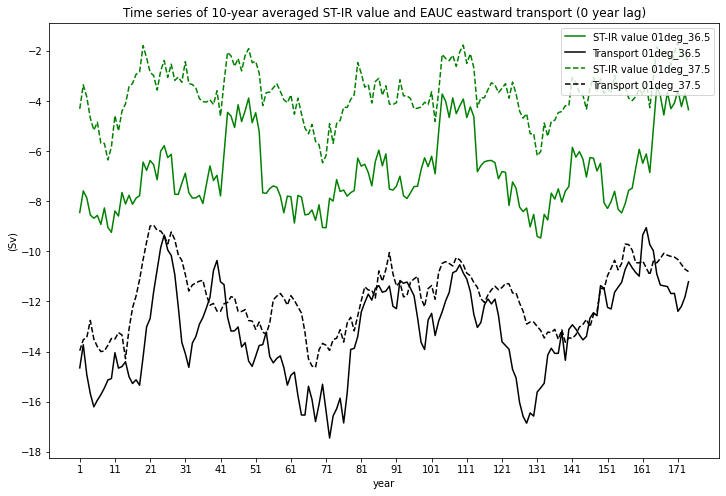

In [22]:
time_series_10_01deg()

### Time series of 10-year averaged

In [15]:
def time_series_10():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,175,1):
        t1.append(tt)

    for tt in range (1,175,10):
        t2.append(tt)
        
    
    # plt.hlines(0,1,174,color="k")
    plt.vlines(61,-31,12,color="k")
    plt.vlines(122,-31,12,color="k")
    plt.plot(t1,y1, 'r',label ='Transport 1deg')
    plt.plot(t1,y2, 'b',label ='Transport 025deg')
    plt.plot(t1,y3, 'g',label ='Transport 01deg')
    plt.plot(t1,x3, color = 'orange', linestyle = '--',label = 'ST-IR value 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    plt.ylim([-34,15])
    
    savefigure('6')

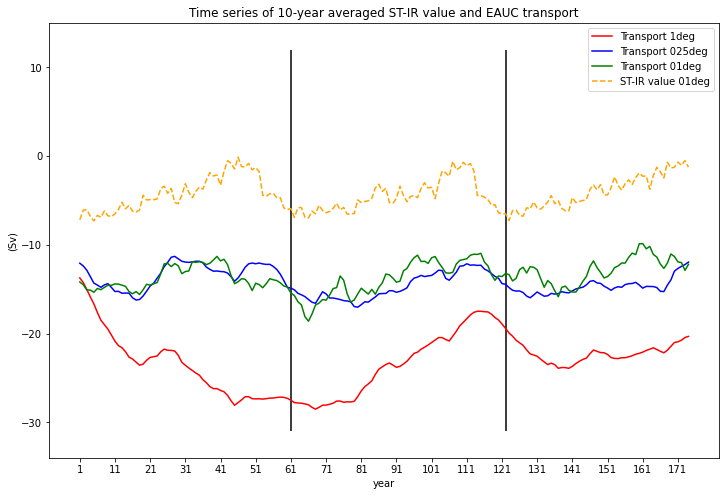

In [16]:
time_series_10()

In [9]:
def time_series_10_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,175,1):
        t1.append(tt)
    
    for tt in range (1,175,1):
        tt = tt + 5
        t3.append(tt)
        
    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x1, 'r--',label = 'ST-IR value 1deg')
    plt.plot(t1,y1, 'k',label ='Transport 1deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC eastward transport (5 years lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC eastward transport and ST-IR value_1deg_5 years lag')


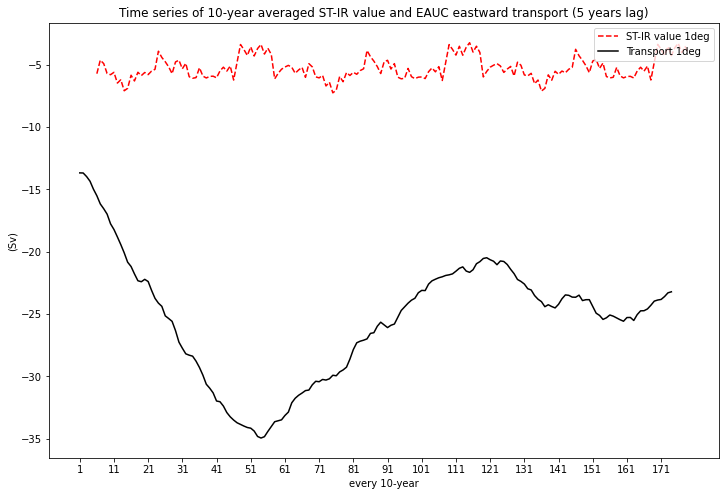

In [10]:
time_series_10_1deg()

In [11]:
def time_series_10_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    for tt in range (1,175,1):
        t1.append(tt)
        
    for tt in range (1,175,1):
        tt = tt + 4
        t3.append(tt)

    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x2, 'b--',label = 'ST-IR value 025deg')
    plt.plot(t1,y2, 'k',label ='Transport 025deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC eastward transport (4 years lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC eastward transport and ST-IR value_025deg_4 years lag')


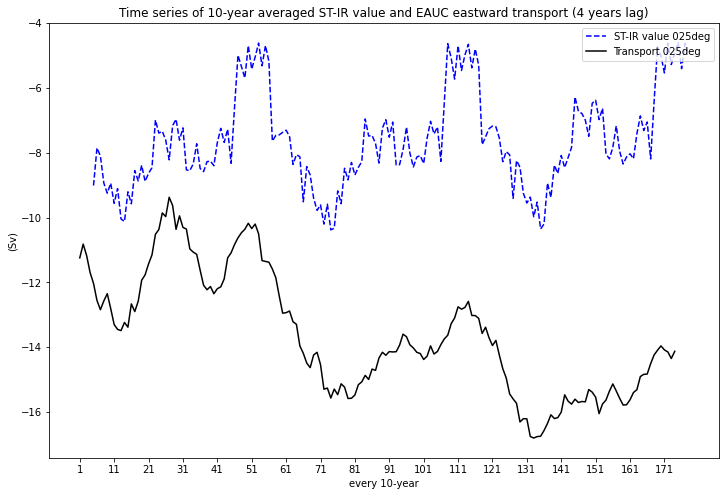

In [12]:
time_series_10_025deg()

In [13]:
def time_series_10_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,175,1):
        t1.append(tt)
        
    for tt in range (1,175,1):
        tt = tt + 0
        t3.append(tt)
        
    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x3, 'g--',label = 'ST-IR value 01deg')
    plt.plot(t1,y3, 'k',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC eastward transport (0 year lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC eastward transport and ST-IR value_01deg_0 year lag')


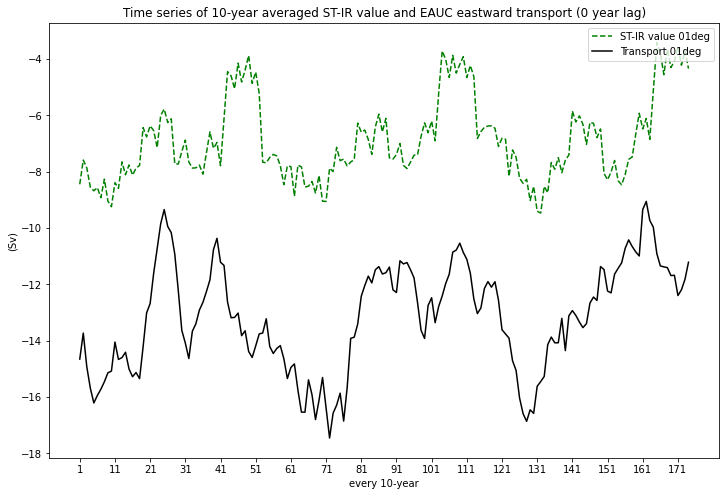

In [14]:
time_series_10_01deg()

### Time series of 5-year averaged

In [6]:
def time_series_5():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,180,1):
        t1.append(tt)

    for tt in range (1,180,10):
        t2.append(tt)
        
    
    plt.hlines(0,1,179,color="k")
    plt.vlines(61,-31,-6,color="k")
    plt.vlines(122,-31,-6,color="k")
    plt.plot(t1,y1, 'r',label ='Transport 1deg')
    plt.plot(t1,y2, 'b',label ='Transport 025deg')
    plt.plot(t1,y3, 'g',label ='Transport 01deg')
    plt.plot(t1,x3, color = 'orange', linestyle = '--',label = 'ST-IR value 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 5-year averaged ST-IR value and EAC transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    plt.ylim([-32,-5])
    
    savefigure('4')

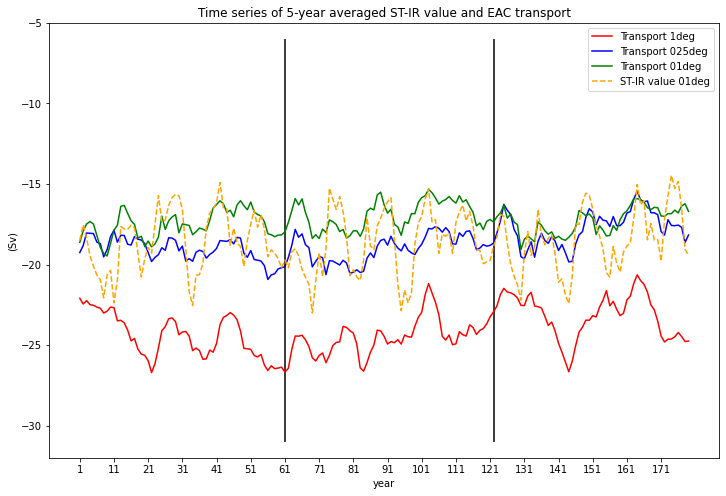

In [7]:
time_series_5()

In [4]:
def time_series_5_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,180,1):
        t1.append(tt)
    
    for tt in range (1,180,1):
        tt = tt + 16
        t3.append(tt)
        
    for tt in range (1,180,10):
        t2.append(tt)
        
    plt.plot(t3,x1, 'r--',label = 'ST-IR value 1deg')
    plt.plot(t1,y1, 'k',label ='Transport 1deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 5-year averaged ST-IR value and EAC southward transport (16 years lag)')
    plt.xlabel('every 5-year')
    plt.ylabel('(Sv)')
    
    savefigure('time series of EAC southward transport and ST-IR value_1deg_16 years lag')

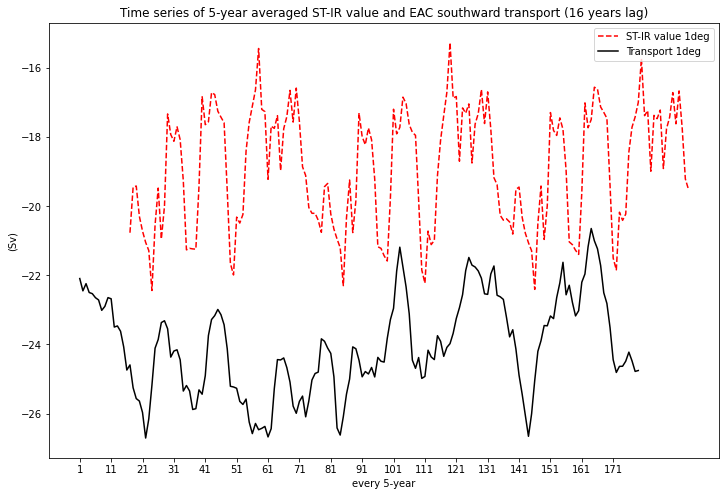

In [5]:
time_series_5_1deg()

In [6]:
def time_series_5_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    for tt in range (1,180,1):
        t1.append(tt)
        
    for tt in range (1,180,1):
        tt = tt + 0
        t3.append(tt)

    for tt in range (1,180,10):
        t2.append(tt)
        
    plt.plot(t3,x2, 'b--',label = 'ST-IR value 025deg')
    plt.plot(t1,y2, 'k',label ='Transport 025deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 5-year averaged ST-IR value and EAC southward transport (0 year lag)')
    plt.xlabel('every 5-year')
    plt.ylabel('(Sv)')

    savefigure('time series of EAC southward transport and ST-IR value_025deg_0 year lag')

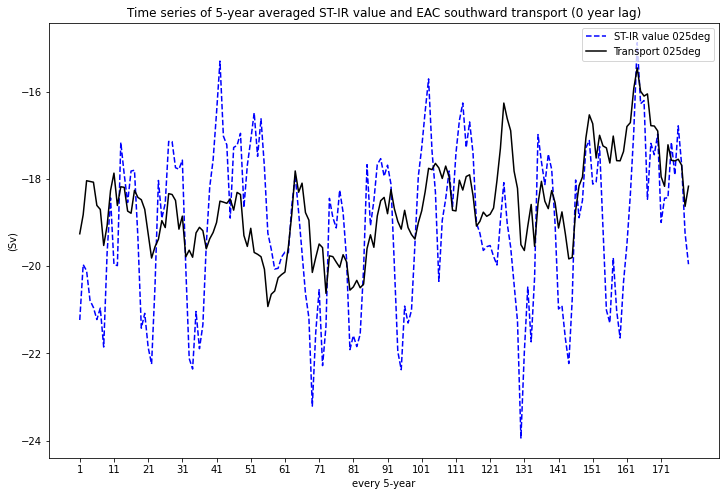

In [7]:
time_series_5_025deg()

In [8]:
def time_series_5_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,180,1):
        t1.append(tt)
        
    for tt in range (1,180,1):
        tt = tt + 0
        t3.append(tt)
        
    for tt in range (1,180,10):
        t2.append(tt)
        
    plt.plot(t3,x3, 'g--',label = 'ST-IR value 01deg')
    plt.plot(t1,y3, 'k',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 5-year averaged ST-IR value and EAC southward transport (0 year lag)')
    plt.xlabel('every 5-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAC southward transport and ST-IR value_01deg_0 year lag')

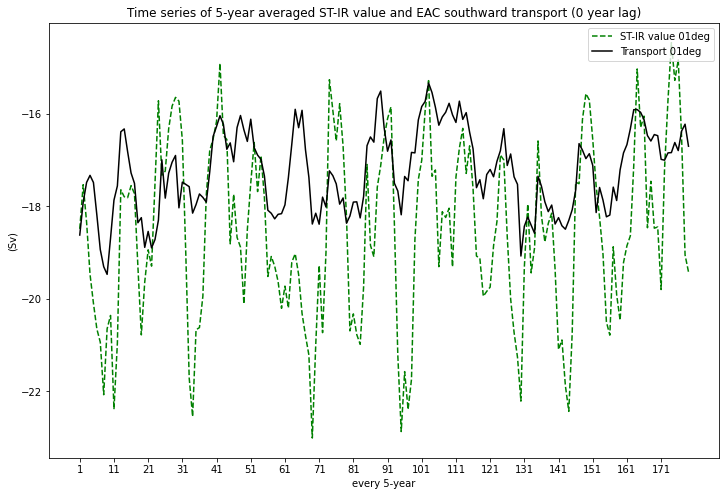

In [9]:
time_series_5_01deg()

### Time series of 1-year averaged

#### EAC

In [18]:
def time_series_1():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,184,1):
        t1.append(tt)

    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.hlines(0,1,183,color="k")
    plt.vlines(61,-31,-6,color="k")
    plt.vlines(122,-31,-6,color="k")
    plt.plot(t1,y1, 'r',label ='Transport 1deg')
    plt.plot(t1,y2, 'b',label ='Transport 025deg')
    plt.plot(t1,y3, 'g',label ='Transport 01deg')
    plt.plot(t1,x3, color = 'orange', linestyle = '--',label = 'ST-IR value 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged ST-IR value and EAC transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    plt.ylim([-32,-5])

    
    savefigure('3')

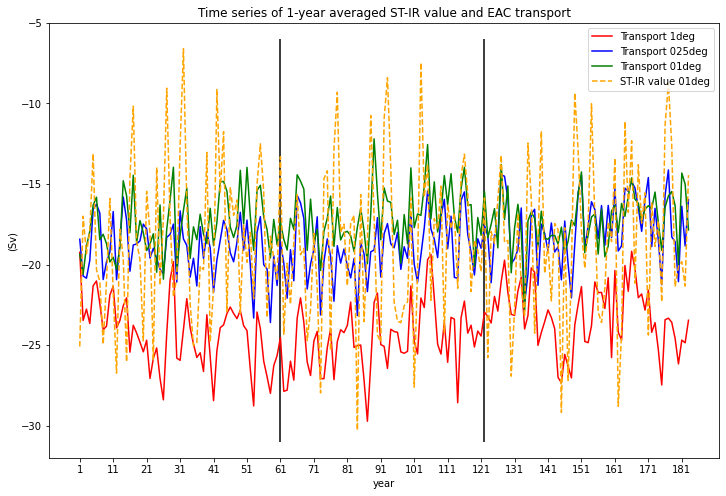

In [19]:
time_series_1()

In [18]:
def time_series_1_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    plt.plot(t1,x1, 'r--',label = 'ST-IR value 1deg')
    plt.plot(t1,y1, 'k',label ='Transport 1deg')
    plt.legend(loc = 'upper right')
                    
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged ST-IR value and EAC southward transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    
    savefigure('time series of EAC southward transport and ST-IR value_1deg')

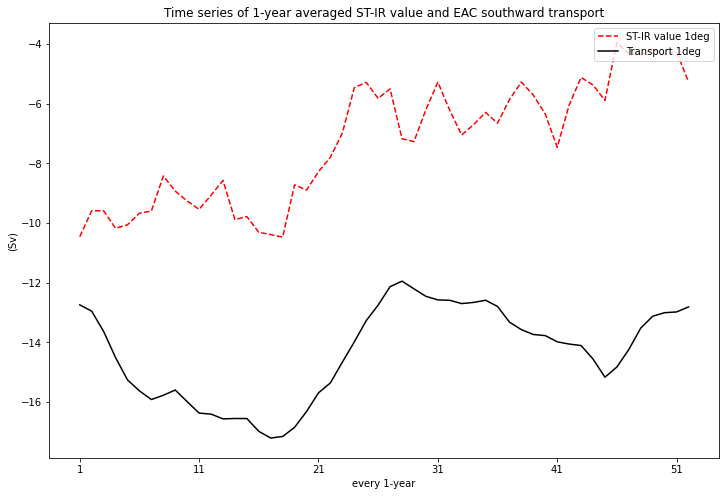

In [31]:
time_series_1_1deg()

In [11]:
def time_series_1_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    plt.plot(t1,x2, 'b--',label = 'ST-IR value 025deg')
    plt.plot(t1,y2, 'k',label ='Transport 025deg')
    plt.legend(loc = 'upper right')
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged ST-IR value and EAC southward transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')

    savefigure('time series of EAC southward transport and ST-IR value_025deg')

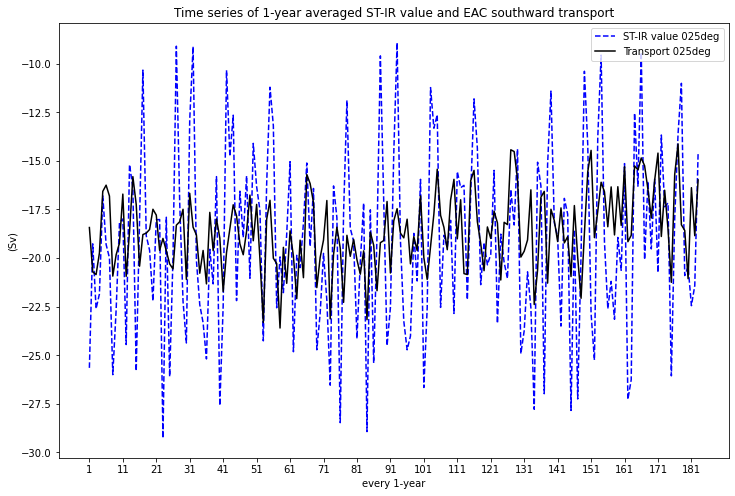

In [12]:
time_series_1_025deg()

In [15]:
def time_series_1_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    plt.plot(t1,x3, 'g--',label = 'ST-IR value 01deg')
    plt.plot(t1,y3, 'k',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged ST-IR value and EAC southward transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    
    savefigure('time series of EAC southward transport and ST-IR value_01deg')

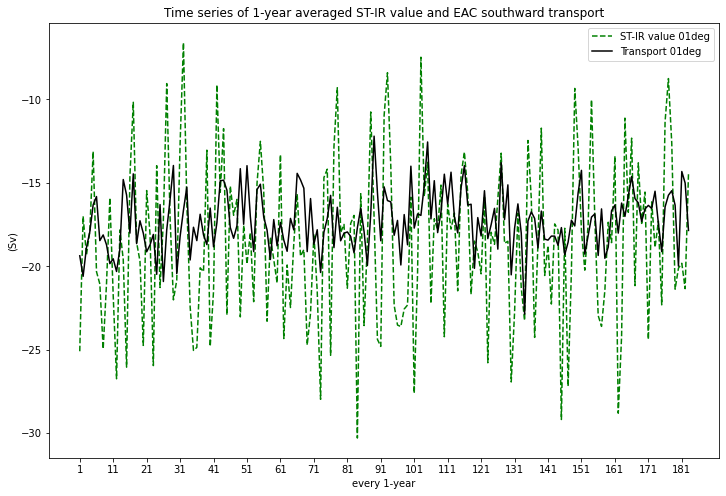

In [16]:
time_series_1_01deg()

#### EAUC

In [21]:
def time_series_1():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,184,1):
        t1.append(tt)

    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.hlines(0,1,183,color="k")
    plt.vlines(61,-31,12,color="k")
    plt.vlines(122,-31,12,color="k")
    plt.plot(t1,y1, 'r',label ='Transport 1deg')
    plt.plot(t1,y2, 'b',label ='Transport 025deg')
    plt.plot(t1,y3, 'g',label ='Transport 01deg')
    plt.plot(t1,x3, color = 'orange', linestyle = '--',label = 'ST-IR value 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged ST-IR value and EAUC transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    plt.ylim([-34,15])

    
    savefigure('5')

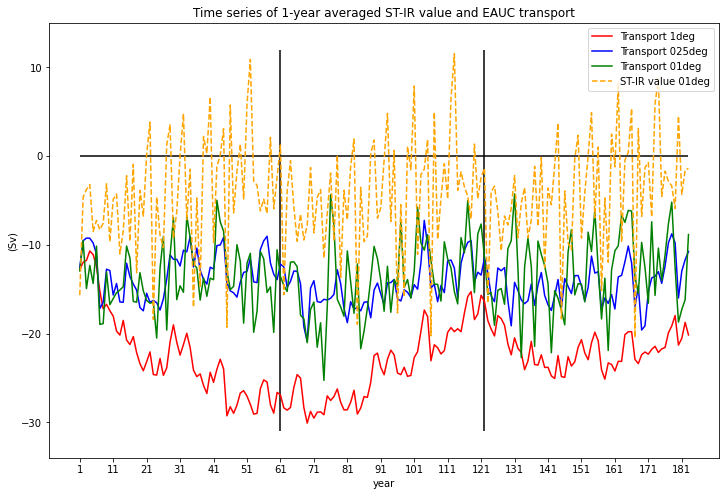

In [22]:
time_series_1()

In [14]:
def time_series_1_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    plt.plot(t1,x1, 'r--',label = 'ST-IR value 1deg')
    plt.plot(t1,y1, 'k',label ='Transport 1deg')
    plt.legend(loc = 'upper right')
                    
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged ST-IR value and EAUC eastward transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    
    savefigure('time series of EAUC eastward transport and ST-IR value_1deg')

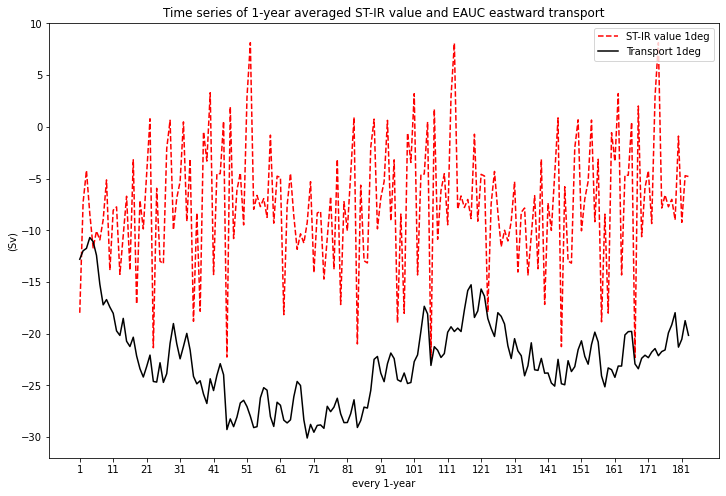

In [15]:
time_series_1_1deg()

In [16]:
def time_series_1_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    plt.plot(t1,x2, 'b--',label = 'ST-IR value 025deg')
    plt.plot(t1,y2, 'k',label ='Transport 025deg')
    plt.legend(loc = 'upper right')
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged ST-IR value and EAUC eastward transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')

    savefigure('time series of EAUC eastward transport and ST-IR value_025deg')

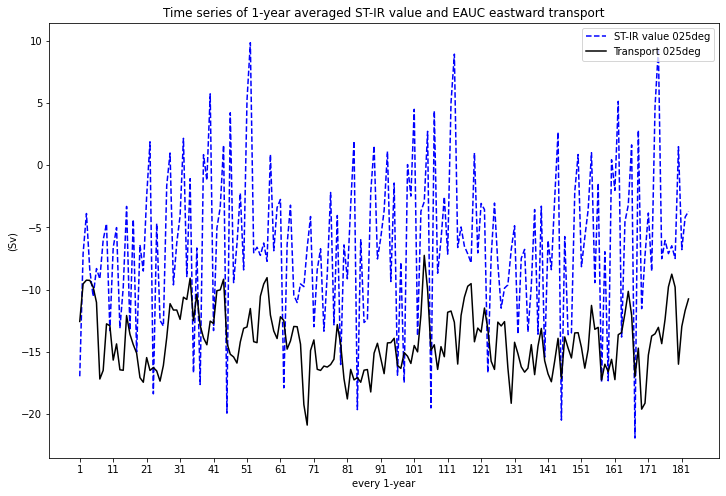

In [17]:
time_series_1_025deg()

In [18]:
def time_series_1_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    plt.plot(t1,x3, 'g--',label = 'ST-IR value 01deg')
    plt.plot(t1,y3, 'k',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged ST-IR value and EAUC eastward transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    
    savefigure('time series of EAUC eastward transport and ST-IR value_01deg')

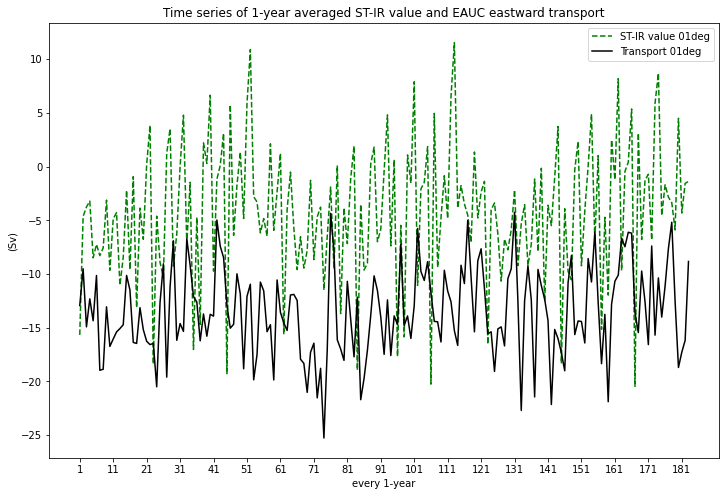

In [19]:
time_series_1_01deg()

### Time series of 10-year averaged with no lag

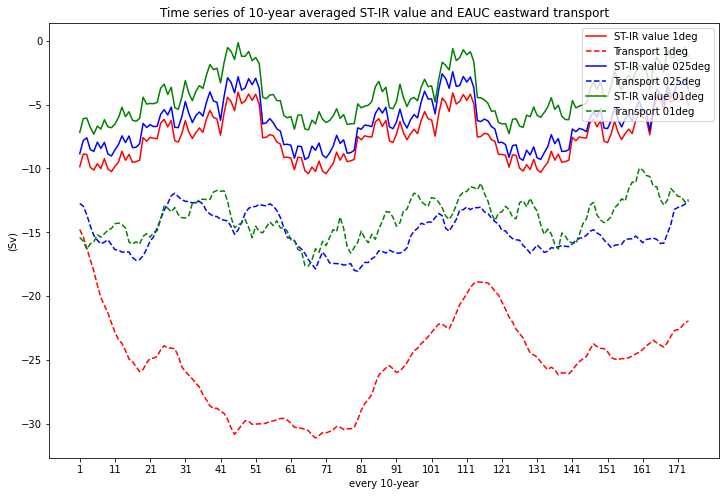

In [7]:
time_series_10()

In [4]:
def time_series_10_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,175,1):
        t1.append(tt)
    
    for tt in range (1,175,1):
        tt = tt + 0
        t3.append(tt)
        
    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x1, 'r--',label = 'ST-IR value 1deg')
    plt.plot(t1,y1, 'k',label ='Transport 1deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC eastward transport (5 years lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC southward transport and ST-IR value_1deg_5 years lag')


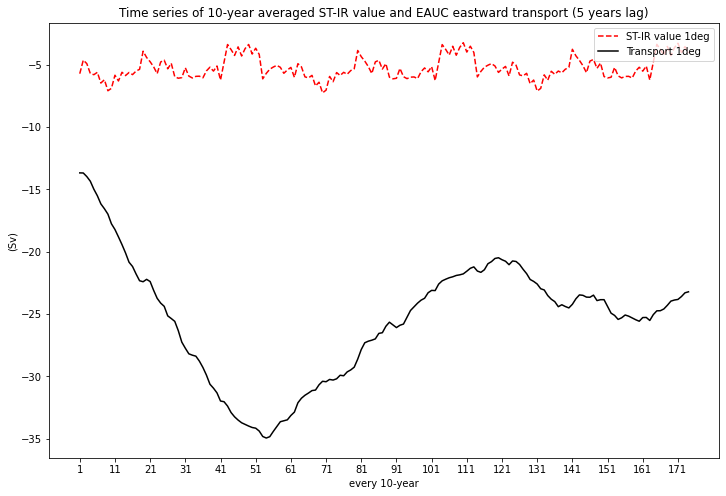

In [5]:
time_series_10_1deg()

In [6]:
def time_series_10_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    for tt in range (1,175,1):
        t1.append(tt)
        
    for tt in range (1,175,1):
        tt = tt + 0
        t3.append(tt)

    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x2, 'b--',label = 'ST-IR value 025deg')
    plt.plot(t1,y2, 'k',label ='Transport 025deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC eastward transport (4 years lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC eastward transport and ST-IR value_025deg_4 years lag')


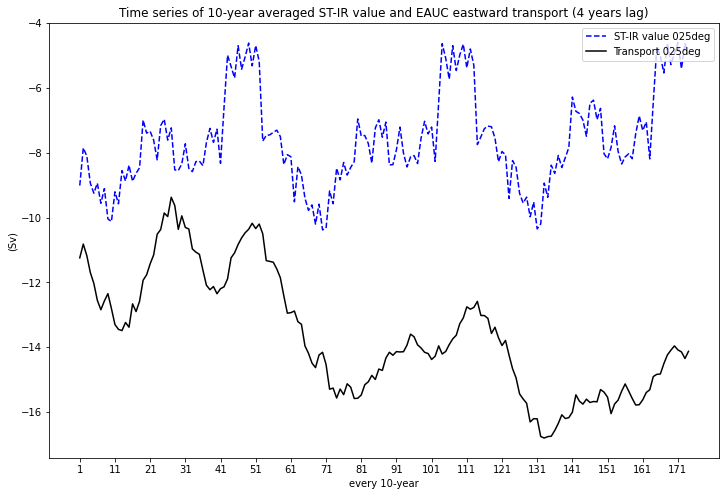

In [7]:
time_series_10_025deg()

In [22]:
def time_series_10_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,175,1):
        t1.append(tt)
        
    for tt in range (1,175,1):
        tt = tt + 0
        t3.append(tt)
        
    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x3, 'g--',label = 'ST-IR value 01deg')
    plt.plot(t1,y3, 'k',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged ST-IR value and EAUC southward transport (0 year lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAUC southward transport and ST-IR value_01deg_0 year lag')


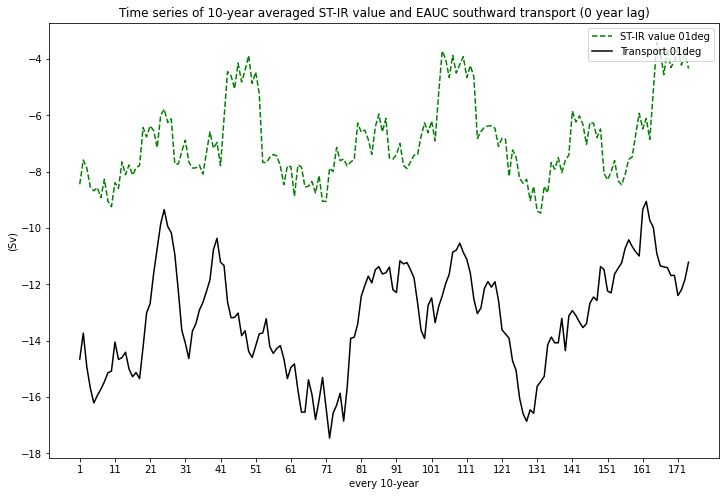

In [23]:
time_series_10_01deg()

### Scatter plot and linear regression

In [4]:
def scatter_plot_1():
    plt.figure(figsize(12,8))
    plt.scatter(x1, y1, label = '1deg', color = 'r')
    
    plt.plot(x1,x1,'r', label = 'x=y')
    
    trend = np.polyfit(x1, y1, 1)
    y = trend[1] + x1*trend[0]
    print(trend[1])
    print(trend[0])
    plt.plot(x1, y, color = 'k', label = 'relationship')
    
    plt.legend(loc = 'upper right')
    plt.title('relationship between EAC trnasport and ST-IR value')
    plt.xlabel('ST-IR value (Sv)')
    plt.ylabel('EAC transport (Sv)')
    
    savefigure('1_1deg') 

-21.99448410860709
0.10873669175133881


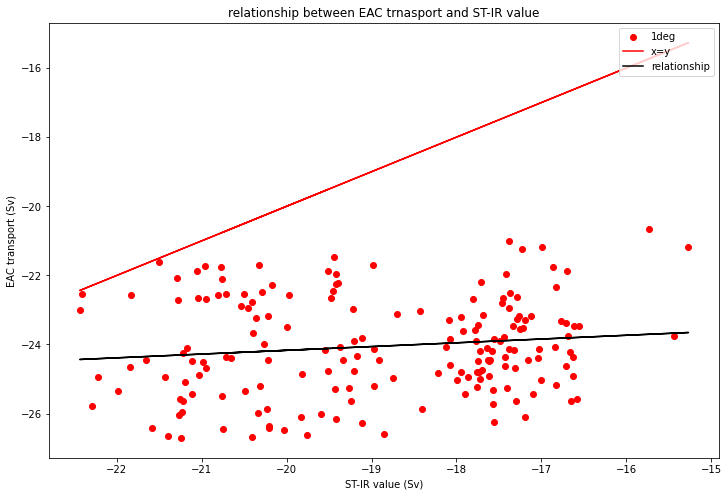

In [5]:
scatter_plot_1()

In [6]:
def scatter_plot_025():
    plt.figure(figsize(12,8))
    plt.scatter(x2, y2, label = '025deg', color = 'b')
    
    plt.plot(x2,x2,'r', label = 'x=y')
    
    trend = np.polyfit(x2, y2, 1)
    y = trend[1] + x2*trend[0]
    print(trend[1])
    print(trend[0])
    plt.plot(x2, y, color = 'k', label = 'relationship')
    
    plt.legend(loc = 'upper right')
    plt.title('relationship between EAC trnasport and ST-IR value')
    plt.xlabel('ST-IR value (Sv)')
    plt.ylabel('EAC transport (Sv)')
    
    savefigure('1_025') 

-13.726569887003835
0.2556843365984622


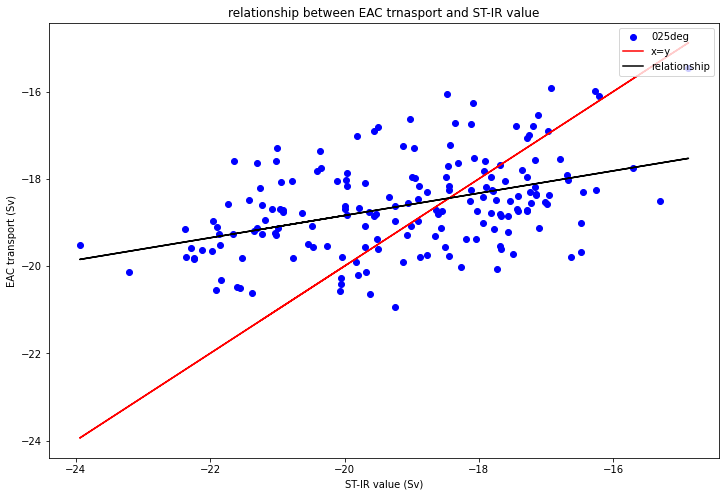

In [7]:
scatter_plot_025()

In [7]:
def scatter_plot_01():
    plt.figure(figsize(12,8))
    plt.scatter(x3, y3, label = '01deg', color = 'g')
    
    plt.plot(x3,x3,'r', label = 'x=y')
    
    plt.plot(x3,x3,'r', label = 'x=y')
    
    trend = np.polyfit(x3, y3, 1)
    y = trend[1] + x3*trend[0]
    print(trend[1])
    print(trend[0])
    plt.plot(x3, y, color = 'k', label = 'relationship')
    
    plt.legend(loc = 'upper right')
    plt.title('relationship between EAC transport and ST-IR value')
    plt.xlabel('ST-IR value (Sv)')
    plt.ylabel('EAC transport (Sv)')
    
    savefigure('1_01') 

-12.775539031520157
0.24120502590413506


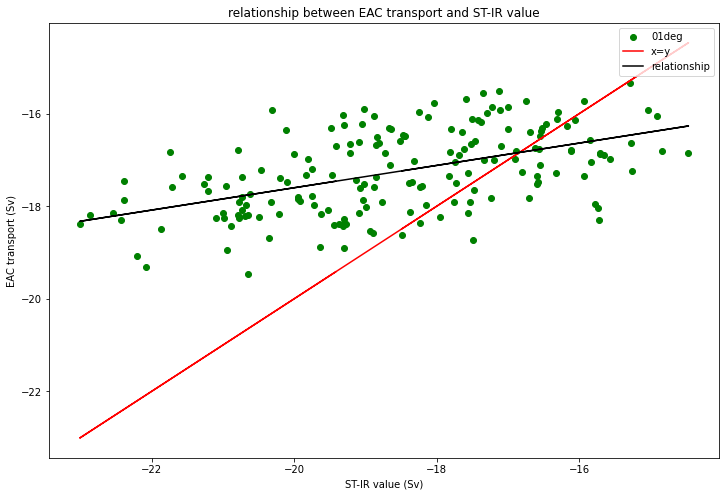

In [8]:
scatter_plot_01()

In [25]:
def time_series_5_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []

    for tt in range (1,180,1):
        t1.append(tt)
        
    for tt in range (1,180,10):
        t2.append(tt)
        
    trend = np.polyfit(x3, y3, 1)
    y = trend[1] + x3*trend[0]
    
    plt.plot(t1,x3, 'g--',label = 'ST-IR value 01deg')
    plt.plot(t1,y, 'g',label = 'prediction by ST-IR value 01deg',linewidth = 2)
    plt.plot(t1,y3, 'k',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 5-year averaged ST-IR value, predction by ST-IR value and EAC southward transport (0 year lag)')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('1')

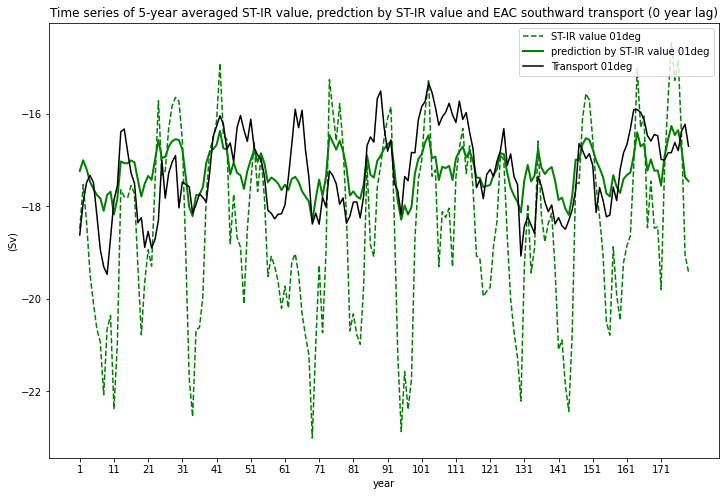

In [26]:
time_series_5_01deg()